In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [3]:
# Set the file paths
bk_data = Path("bk_data.csv")
fang_data = Path("fang_data.csv")
jnj_data = Path("jnj_data.csv")
luv_data = Path("luv_data.csv")
mu_data = Path("mu_data.csv")
nke_data = Path("nke_data.csv")
sbux_data = Path("sbux_data.csv")
t_data = Path("t_data.csv")
wdc_data = Path("wdc_data.csv")
wrk_data = Path("wrk_data.csv")

In [4]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

In [5]:
# Display a few rows
sbux_df.head()

,close
date,
2019-05-20,76.66
2019-05-17,78.91
2019-05-16,78.90
2019-05-15,77.76
2019-05-14,77.06


In [15]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.columns = ["BK", "FANG", "JNJ", "LUV", "MU", "NKE", "SBUX", "T", "WDC", "WRK"]
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.96,99.33,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.39,99.12,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.25,99.64,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.16,97.68,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.38,97.46,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


In [23]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


In [24]:
#Evaluate Riskiness of Stocks --> calc the annunal vol
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(ascending=False)

MU      0.479955
WDC     0.415605
FANG    0.370704
WRK     0.303601
LUV     0.280021
NKE     0.246045
BK      0.224967
SBUX    0.206805
T       0.187579
JNJ     0.161128
dtype: float64

In [25]:
# Drop the five stocks with the highest volatility in daily returns
daily_returns.drop(columns=["MU", "WDC", "FANG", "WRK", "LUV"], inplace=True)
daily_returns.head()

,BK,JNJ,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.002114,-0.009414,0.006703,0.011179
2015-06-26,0.003034,0.005246,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.019671,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002252,0.003251,0.001214,-0.006989


In [27]:
# Set weights for corresponding risk profile of stocks,
weights = [0.15, 0.05, 0.10, 0.2, 0.5]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2015-06-24         NaN
2015-06-25    0.004358
2015-06-26    0.006190
2015-06-29   -0.015759
2015-06-30   -0.002393
dtype: float64

In [28]:
# Use the `cumprod` function to calculate cumulative returns
cum_returns = (1 + portfolio_returns).cumprod()
cum_returns.head()

date
2015-06-24         NaN
2015-06-25    1.004358
2015-06-26    1.010575
2015-06-29    0.994650
2015-06-30    0.992269
dtype: float64

<AxesSubplot:xlabel='date'>

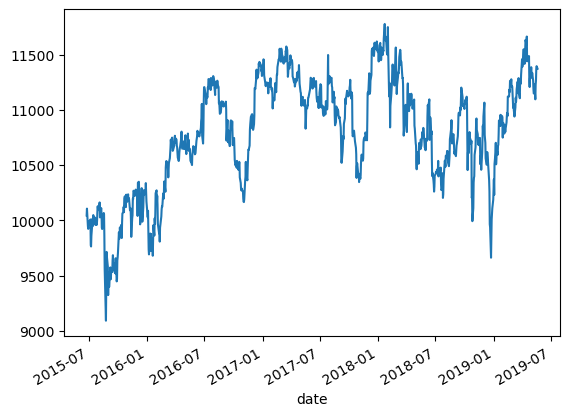

In [30]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
(initial_investment * cum_returns).plot()

In [31]:
#PART 2: Portfolio Optimization via Correlation and Return-to-risk (Sharpe Ratio) Evaluations
# Reset Daily Returns DataFrame
# Re-calculate daily returns as the DataFrame was modified in part 1 (we dropped columns above)

daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


In [32]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()
correlation

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
BK,1.000000,0.316856,0.350064,0.390731,0.339511,0.352312,0.361186,0.284662,0.373527,0.473280
FANG,0.316856,1.000000,0.221352,0.169883,0.257745,0.228170,0.211182,0.186524,0.259662,0.294395
JNJ,0.350064,0.221352,1.000000,0.248263,0.173480,0.297197,0.366453,0.343575,0.223365,0.295180
LUV,0.390731,0.169883,0.248263,1.000000,0.296751,0.285755,0.314467,0.220850,0.273768,0.294395
MU,0.339511,0.257745,0.173480,0.296751,1.000000,0.196334,0.247012,0.174143,0.609577,0.405658
NKE,0.352312,0.228170,0.297197,0.285755,0.196334,1.000000,0.398614,0.240217,0.242891,0.271221
SBUX,0.361186,0.211182,0.366453,0.314467,0.247012,0.398614,1.000000,0.238597,0.281220,0.303981
T,0.284662,0.186524,0.343575,0.220850,0.174143,0.240217,0.238597,1.000000,0.153232,0.281383
WDC,0.373527,0.259662,0.223365,0.273768,0.609577,0.242891,0.281220,0.153232,1.000000,0.397666
WRK,0.473280,0.294395,0.295180,0.294395,0.405658,0.271221,0.303981,0.281383,0.397666,1.000000


<AxesSubplot:>

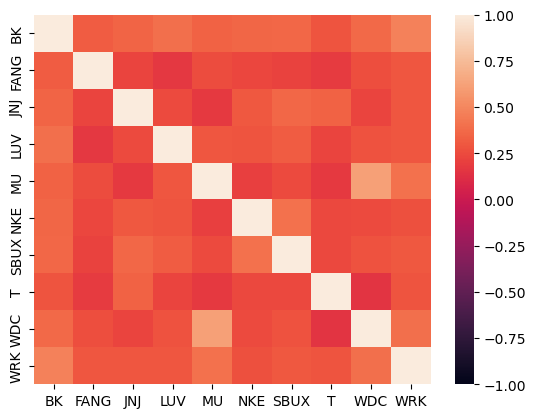

In [33]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

In [43]:
#sum up values of corr for numeric reprresentation of the correlation
correlation.sum(axis=0).sort_values(ascending=False)

BK      4.242129
WRK     4.017159
WDC     3.814908
SBUX    3.722712
MU      3.700211
JNJ     3.518928
NKE     3.512710
LUV     3.494862
FANG    3.145768
T       3.123182
dtype: float64

In [44]:
# Drop highly correlated stocks and keep only the non-correlated stocks (this would be the highest 2 numbers)
non_corr_daily_returns = daily_returns.drop(columns=["BK", "WRK"])
non_corr_daily_returns.head()

,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC
date,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290
2015-06-26,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452
2015-06-29,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485
2015-06-30,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192


In [45]:
#calc annualized sharpe ratio
sharpe_ratios = (non_corr_daily_returns.mean()*252) / (non_corr_daily_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False, inplace=True)
sharpe_ratios

JNJ     0.609743
NKE     0.585923
SBUX    0.545402
LUV     0.520850
MU      0.435027
FANG    0.421266
T      -0.050216
WDC    -0.245731
dtype: float64

In [47]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks
updated_portfolio = non_corr_daily_returns.drop(columns=["T", "WDC"])
updated_portfolio.head()

,FANG,JNJ,LUV,MU,NKE,SBUX
date,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020139,-0.002114,0.004076,-0.001663,-0.009414,0.006703
2015-06-26,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172
2015-06-29,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590
2015-06-30,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214


<AxesSubplot:title={'center':'equal weight portfolio'}, xlabel='date'>

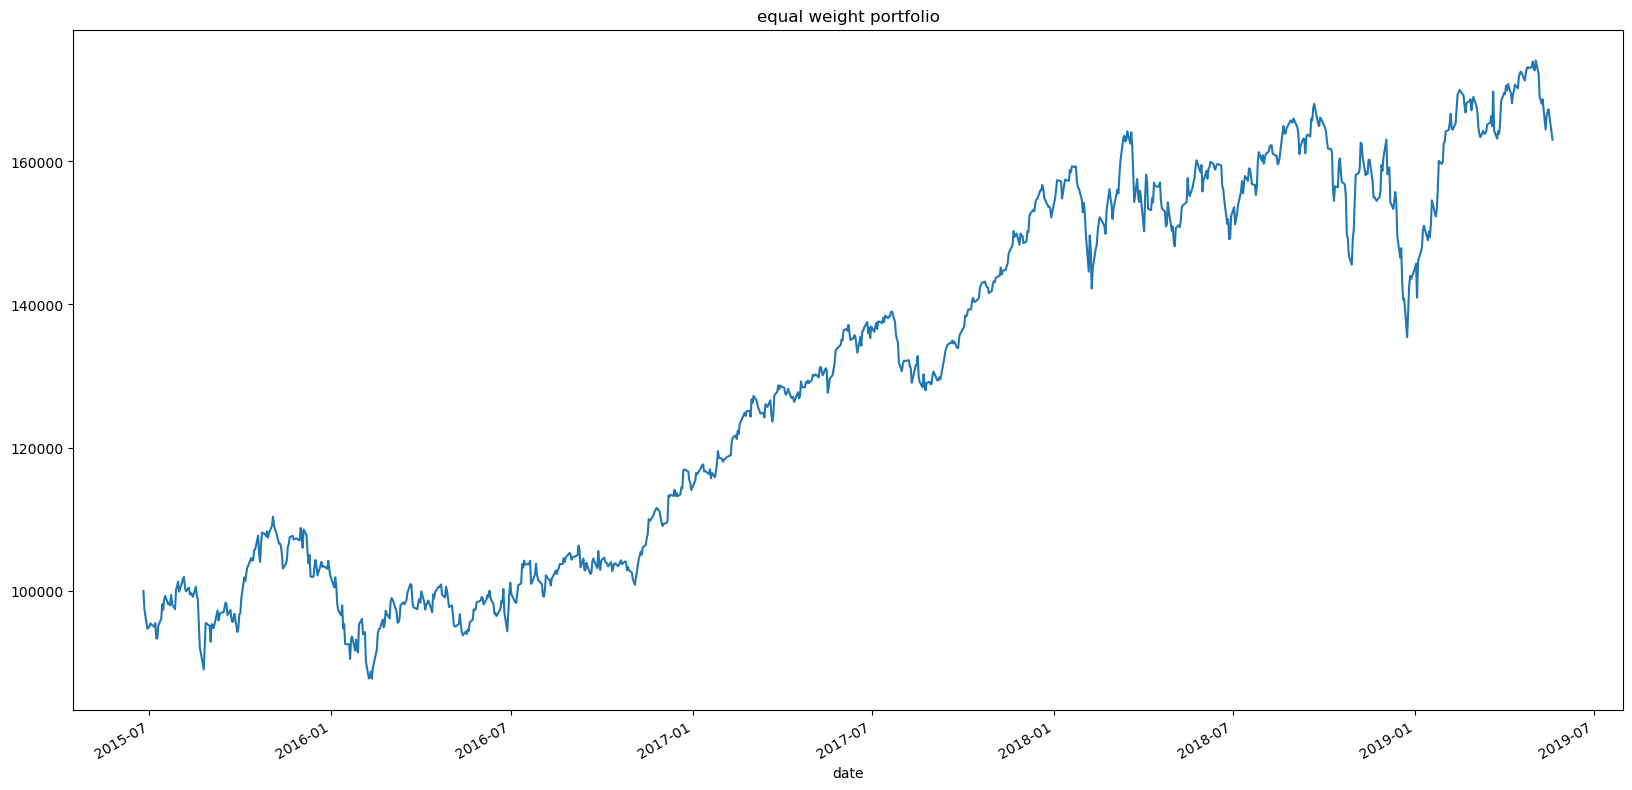

In [48]:
#Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio
initial_investment = 100000
weights = [0, 0.2, 0.2, 0.2, 0.2, 0.2]

target_portfolio_returns = updated_portfolio.dot(weights)

target_cum_returns = (1 + target_portfolio_returns).cumprod()

(target_cum_returns * initial_investment).plot(figsize =(20,10), title = "equal weight portfolio")